# Exploratory Data Analysis (EDA)

In [1]:
from Modules import *

### Read the Dataframe

This project is to determine whether the tumor found in a series of samples containing breast cancer cells is benign or malignant. The cell samples to be classified are provided in the file breastcancer.csv

In [2]:
df = pd.read_csv('../data/breastcancer.csv')
print(f"The shape of the Dataframe is {df.shape}\n {'-- '*35} ")
df.head()

The shape of the Dataframe is (629, 11)
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --  


,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1246562,10,2,2,1,2,6.0,1,1,2,1
1,822829,7,6,4,8,10,10.0,9,5,3,1
2,1217264,1,1,1,1,2,1.0,3,1,1,0
3,1296025,4,1,2,1,2,1.0,1,1,1,0
4,1203096,1,1,1,1,1,1.0,3,1,1,0


*data dictionary* 

Column number | Column name       | Type      | Description
---           | ---                 | ---                 | ---
0            | `id`       | categorical (`int`) | ID number of the cell sample.
1 | `clump_thickness` | numeric (`int`) | clump thickness (on a scale from 1 to 10)
2 | `size_uniformity` | numeric (`int`) | uniformity of cell size (on a scale from 1 to 10)
3 | `shape_uniformity` | numeric (`int`) | uniformity of cell shape (on a scale from 1 to 10)
4 | `marginal_adhesion` | numeric (`int`) | marginal adhesion (on a scale from 1 to 10)
5 | `epithelial_size` | numeric (`int`) | single epithelial cell size (on a scale from 1 to 10)
6 | `bare_nucleoli` | numeric (`int`) | bare nucleoli (on a scale from 1 to 10)
7 | `bland_chromatin` | numeric (`int`) | coarse nucleation of chromatin (on a scale from 1 to 10)
8 | `normal_nucleoli` | numeric (`int`) | Normal nucleoli (on a scale from 1 to 10)
9 | `mitoses` | numeric (`int`) | mitoses (on a scale from 1 to 10)
10 | `class` | categorical (`int`) | tumor type: 0 for `benign`, 1 for `malignant`

----------------------

Info

In [3]:
df.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 629 non-null    int64  
 1   clump_thickness    629 non-null    int64  
 2   size_uniformity    629 non-null    int64  
 3   shape_uniformity   629 non-null    int64  
 4   marginal_adhesion  629 non-null    int64  
 5   epithelial_size    629 non-null    int64  
 6   bare_nucleoli      613 non-null    float64
 7   bland_chromatin    629 non-null    int64  
 8   normal_nucleoli    629 non-null    int64  
 9   mitoses            629 non-null    int64  
 10  class              629 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 54.2 KB


In [4]:
df = df.astype({'class': 'category', 
                'id'   : 'category'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 629 non-null    category
 1   clump_thickness    629 non-null    int64   
 2   size_uniformity    629 non-null    int64   
 3   shape_uniformity   629 non-null    int64   
 4   marginal_adhesion  629 non-null    int64   
 5   epithelial_size    629 non-null    int64   
 6   bare_nucleoli      613 non-null    float64 
 7   bland_chromatin    629 non-null    int64   
 8   normal_nucleoli    629 non-null    int64   
 9   mitoses            629 non-null    int64   
 10  class              629 non-null    category
dtypes: category(2), float64(1), int64(8)
memory usage: 67.1 KB


In [5]:
# check for unique values of classes in train- and test set (aim_set does not contain classes)
print('number of unique IDs:', df['id'].nunique())

df[df.duplicated(keep = False)].sort_values(by=list(df.columns))    # keep = False or first, or last

number of unique IDs: 585


,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
84,320675,3,3,5,2,3,10.0,7,1,1,1
126,320675,3,3,5,2,3,10.0,7,1,1,1
285,466906,1,1,1,1,2,1.0,1,1,1,0
432,466906,1,1,1,1,2,1.0,1,1,1,0
35,704097,1,1,1,1,1,1.0,2,1,1,0
186,704097,1,1,1,1,1,1.0,2,1,1,0
387,1100524,6,10,10,2,8,10.0,7,3,3,1
506,1100524,6,10,10,2,8,10.0,7,3,3,1
121,1116116,9,10,10,1,10,8.0,3,3,1,1
391,1116116,9,10,10,1,10,8.0,3,3,1,1


In [6]:
df.drop_duplicates(keep = 'first', inplace = True)
df.shape

(624, 11)

check for unique values of classes in df

In [7]:
df[df.isnull().any(axis = 1)]

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
25,61634,5,4,3,1,2,NaN,2,3,1,0
30,432809,3,1,3,1,2,NaN,2,1,1,0
88,169356,3,1,1,1,2,NaN,3,1,1,0
89,1193683,1,1,2,1,3,NaN,1,1,1,0
133,1096800,6,6,6,9,6,NaN,7,8,1,0
151,704168,4,6,5,6,7,NaN,4,9,1,0
158,733639,3,1,1,1,2,NaN,3,1,1,0
174,1241232,3,1,4,1,2,NaN,3,1,1,0
176,1183246,1,1,1,1,1,NaN,2,1,1,0
204,1238464,1,1,1,1,1,NaN,2,1,1,0


In [8]:
df.dropna(how = 'any', inplace = True)
print(df.shape)
df.isna().sum()

(608, 11)


id                   0
clump_thickness      0
size_uniformity      0
shape_uniformity     0
marginal_adhesion    0
epithelial_size      0
bare_nucleoli        0
bland_chromatin      0
normal_nucleoli      0
mitoses              0
class                0
dtype: int64

Distribution of Classes

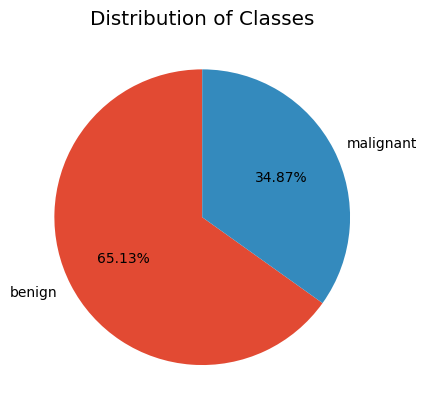

In [9]:
plt.style.use('ggplot')
#--------------------------------------------------------
distribution = df['class'].value_counts(normalize = True)
plt.pie(distribution, 
        labels = ['benign', 'malignant'], 
        startangle = 90, 
        autopct = '%.2f%%')

plt.title('Distribution of Classes');

Correlation among the numerical variables 

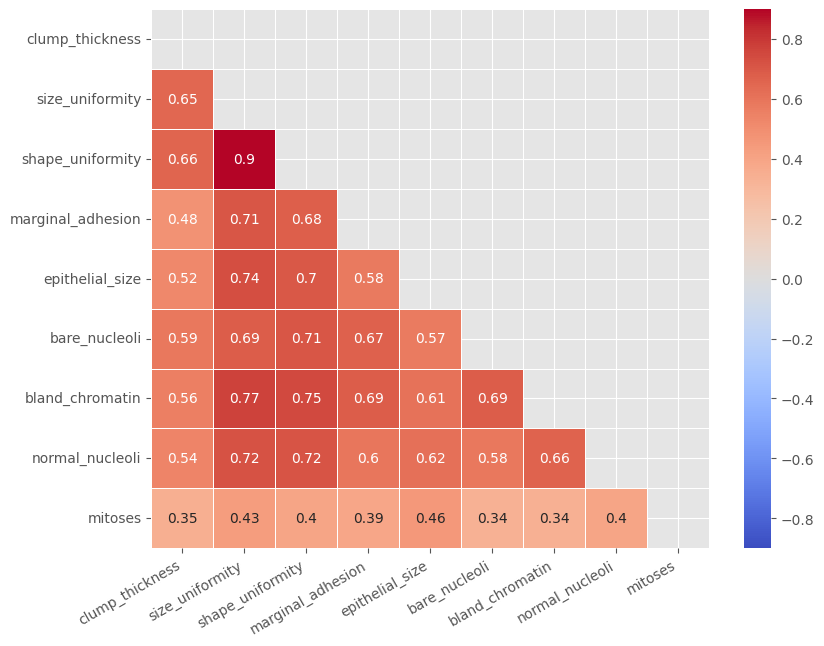

In [10]:
# check for intercorrelations in data set
#---------------------------------------
fig, ax = plt.subplots(figsize = [9,7])
corr    = df.corr(numeric_only=True)
matrix  = np.triu(corr)
#--------------------------------------
sns.heatmap(data       = corr, 
            annot      =  True, 
            vmin       = -.9 , 
            vmax       = .9, 
            cmap       = 'coolwarm', 
            mask       = matrix, 
            linewidths = 0.5,
            linecolor  = 'white')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30, ha = 'right');

Pair plot

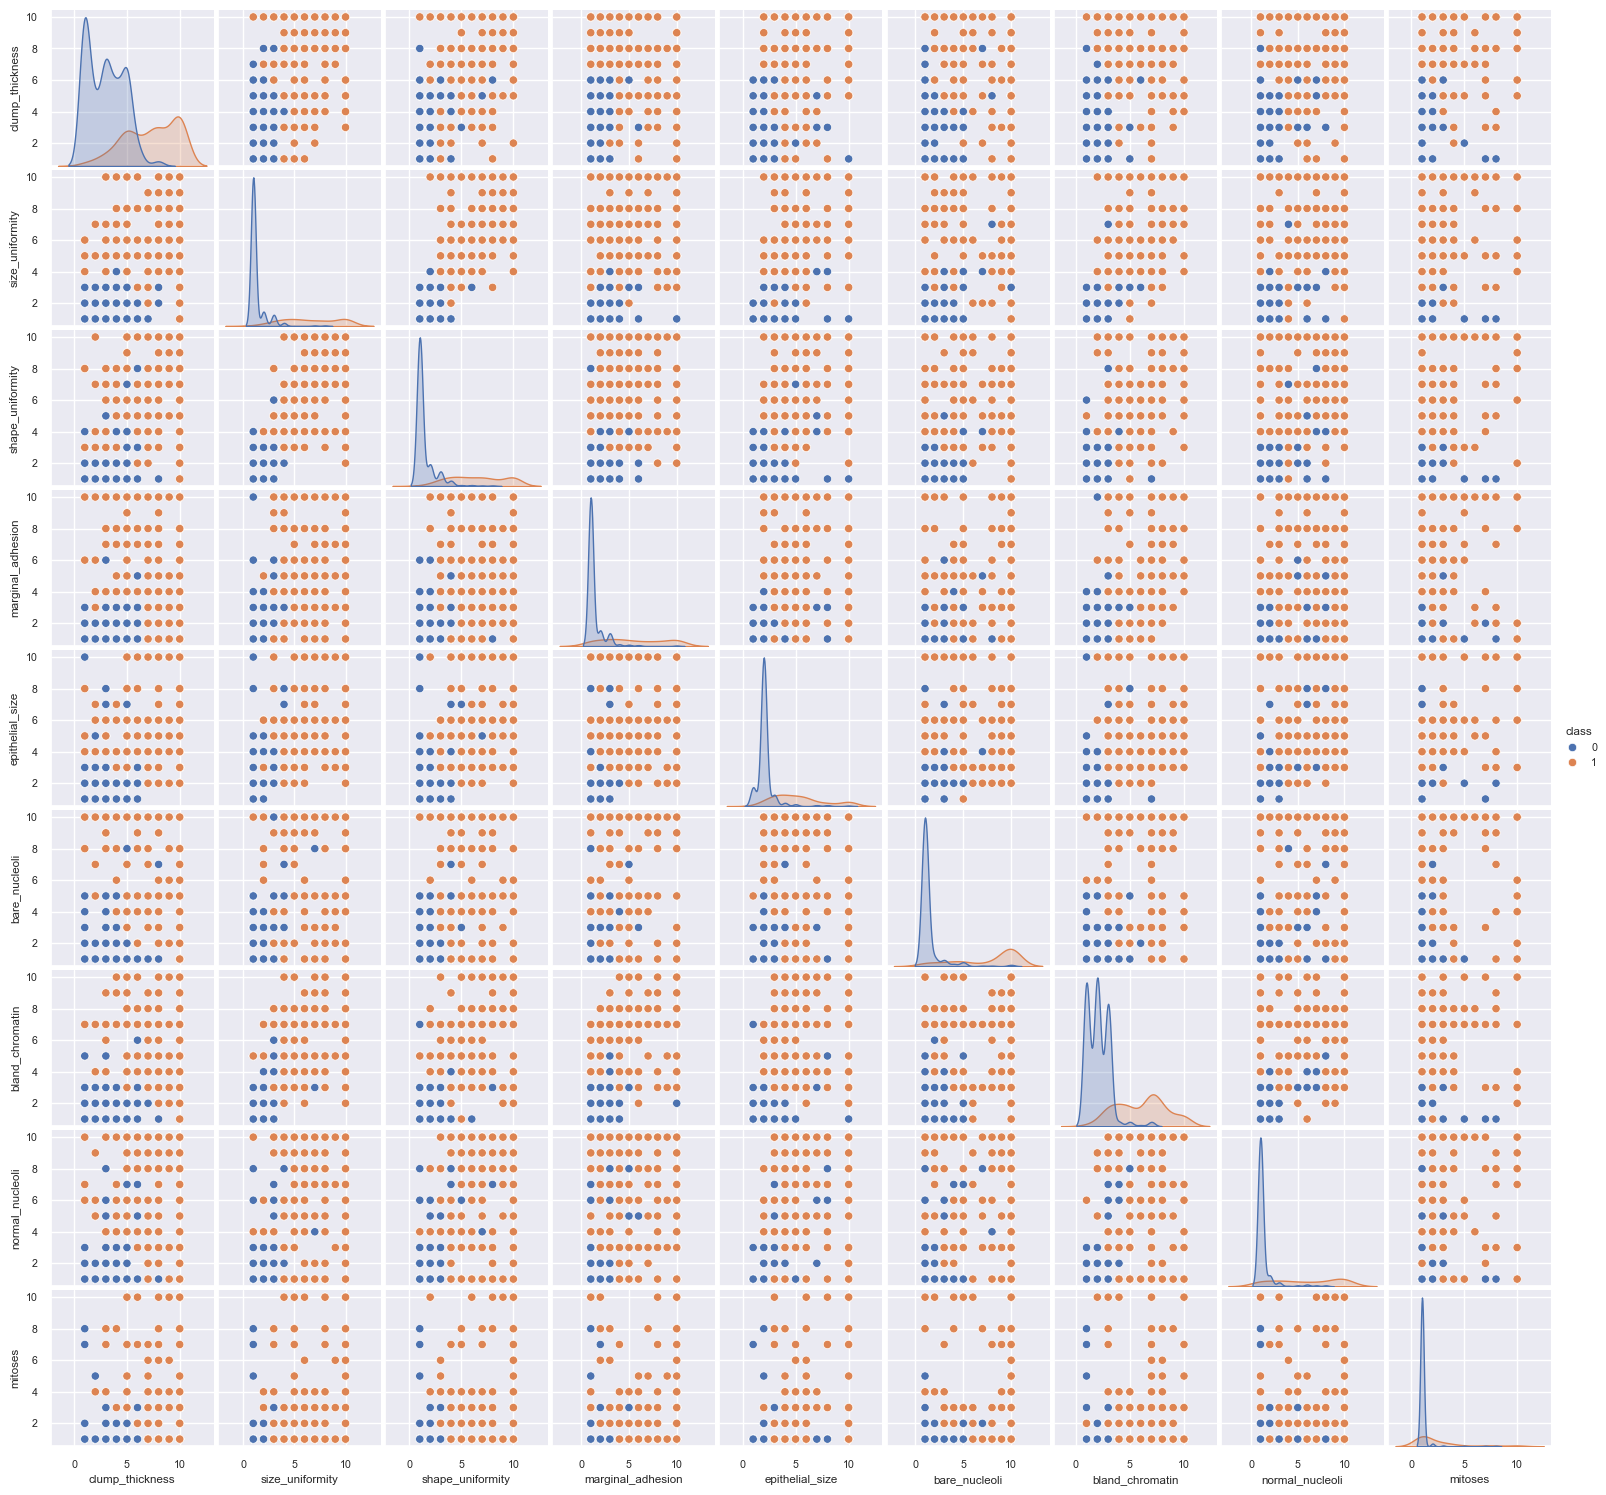

In [11]:
sns.set(font_scale = 0.7)
# -- -- -- -- -- -- -- -- -- -- 

g = sns.pairplot(data   = df,   
                # corner = True, 
                hue    = 'class')
g.fig.set_size_inches(16,15);

Describe the numerical variables scope

In [12]:
# check for unrealistic or impossible values 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
clump_thickness,608.0,4.442434,2.851048,1.0,2.0,4.0,6.00,10.0
size_uniformity,608.0,3.118421,3.016013,1.0,1.0,1.0,5.00,10.0
shape_uniformity,608.0,3.187500,2.946705,1.0,1.0,1.0,5.00,10.0
marginal_adhesion,608.0,2.800987,2.835094,1.0,1.0,1.0,3.25,10.0
epithelial_size,608.0,3.200658,2.192363,1.0,2.0,2.0,4.00,10.0
bare_nucleoli,608.0,3.518092,3.632591,1.0,1.0,1.0,5.25,10.0
bland_chromatin,608.0,3.447368,2.467020,1.0,2.0,3.0,5.00,10.0
normal_nucleoli,608.0,2.871711,3.063844,1.0,1.0,1.0,4.00,10.0
mitoses,608.0,1.575658,1.656956,1.0,1.0,1.0,1.00,10.0


In [13]:
# Ignore FutureWarnings globally
warnings.simplefilter(action='ignore', category=FutureWarning)

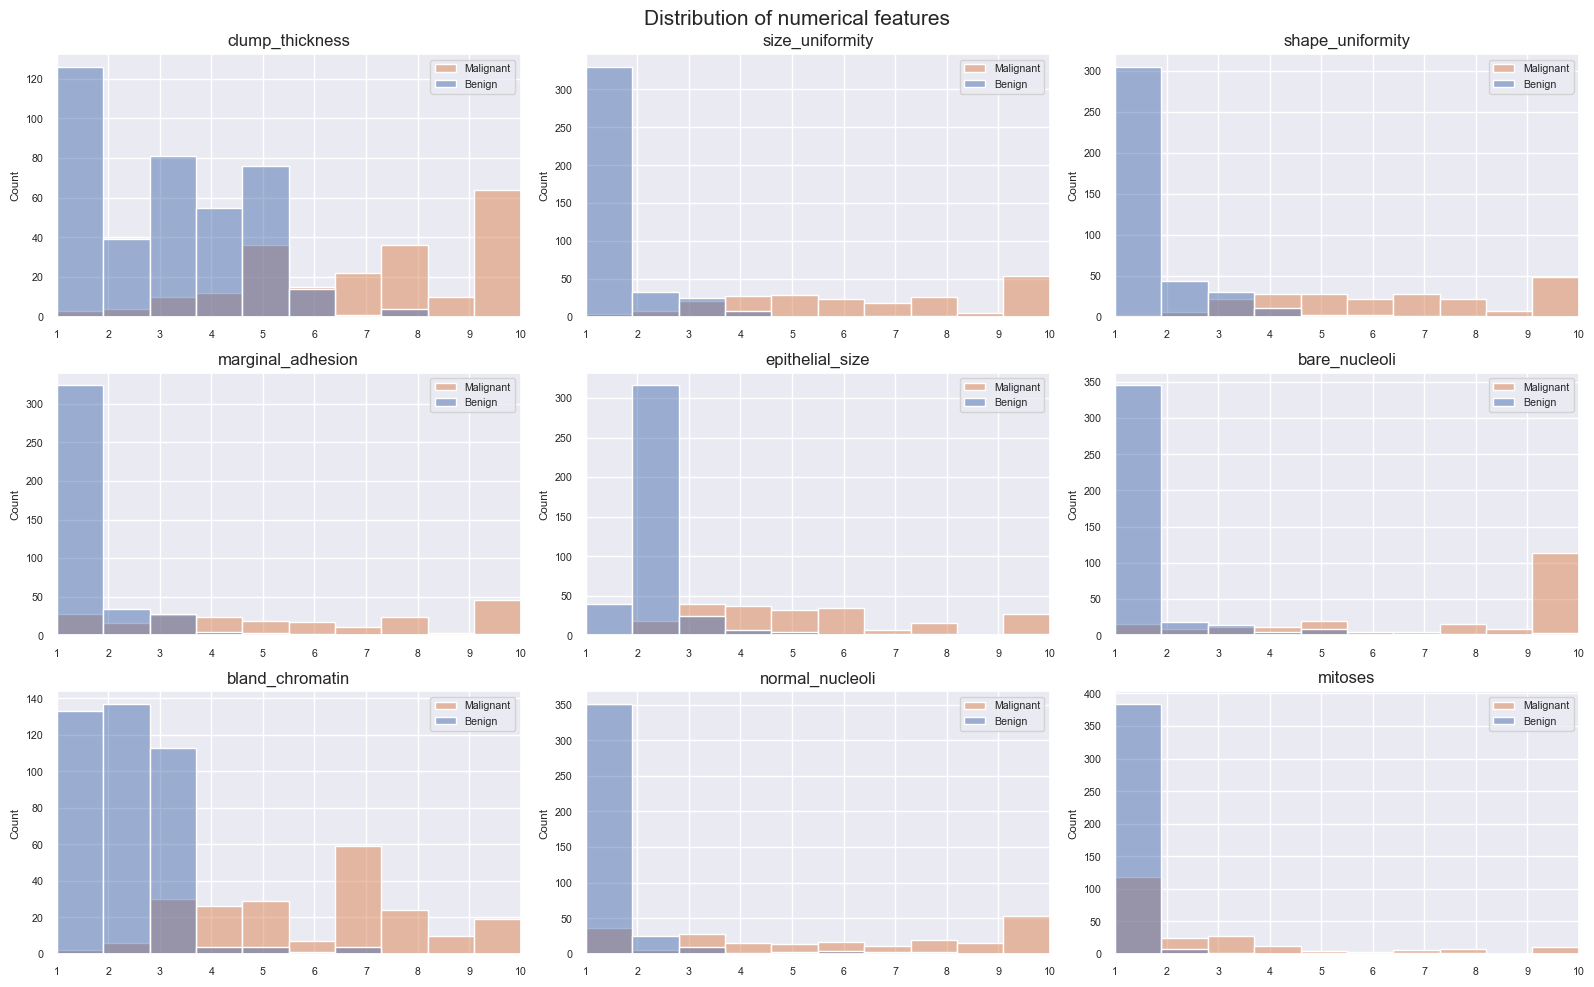

In [14]:
# bin = int(np.ceil(1 + 3.3 * np.log(df.shape[0])))
num_cols = 3
selected_features_number = len(df.select_dtypes(include = np.number).columns)
num_rows                 = math.ceil(selected_features_number / num_cols)


selected_columns         = df.select_dtypes(include = np.number).columns

fig, axes                = plt.subplots(nrows   = num_rows, 
                                        ncols   = num_cols, 
                                        figsize = (16,10))

axes                     = axes.flatten()                                      # Flatten the 2D array of subplots into a 1D array

for i, col in enumerate(selected_columns):
    ax = axes[i]
    sns.histplot(data  = df, 
                 x     = col, 
                 hue   = 'class', 
                 alpha = 0.5,  
                 bins  = 10,
                 ax    = ax)
    ax.legend(labels = ['Malignant', 'Benign'])
    ax.set_title(col, fontsize = 12)
    ax.set_xlim(1, 10)
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels())
    ax.set_xlabel('')
plt.suptitle('Distribution of numerical features', fontsize = 15)
plt.tight_layout();


## Paired Boxplots and Histograms for Numerical Features in a Binary Classification Dataset

This code efficiently generates paired boxplots and histograms for numerical features in a binary classification dataset. Arranged in a grid layout, each row corresponds to a distinct numerical feature. The upper plot in each cell displays a boxplot, while the lower plot features a histogram for the same variable. This setup allows for a concise and clear examination of the distribution and class-wise variations of numerical features in the dataset.

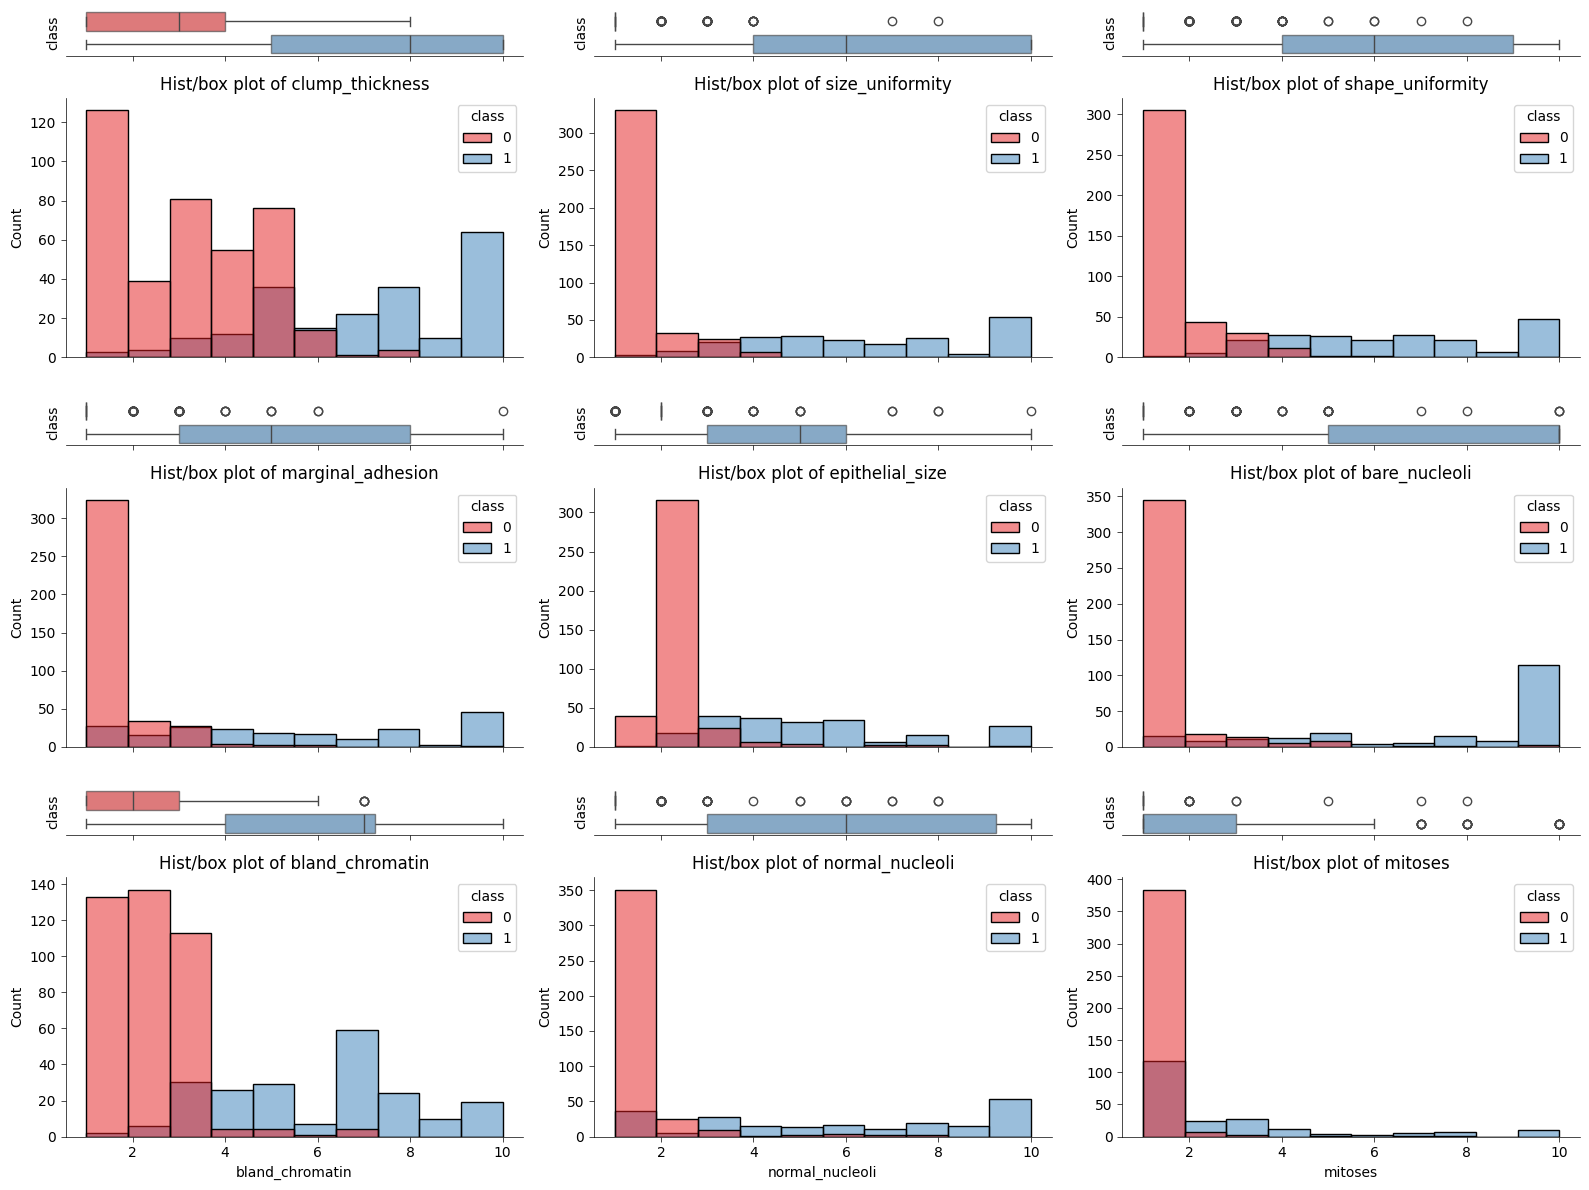

In [15]:

plt.style.use('default')
num_cols = 3  # Enter the number of the wished columns
# ---------------------------------------------------------------------------------------------------------

selected_features_number = len(df.select_dtypes(include = np.number).columns)
num_rows                 = math.ceil(selected_features_number / num_cols)
selected_columns         = df.select_dtypes(include = np.number).columns

fig, axes                = plt.subplots(nrows       = num_rows * 2,
                                        ncols       = num_cols,
                                        sharex      = 'col',
                                        figsize     = (16, 12),
                                        gridspec_kw = {"height_ratios": [0.15, 0.85] * num_rows})
# ----------------------------------------------------------------------------------------------------------

for i, col in enumerate(selected_columns):
    ax_box  = axes[i // num_cols * 2    , i % num_cols]
    ax_hist = axes[i // num_cols * 2 + 1, i % num_cols]

    # Box plot
    sns.boxplot(data=df, x=col, y='class', orient='h', palette="Set1", ax=ax_box, boxprops=dict(alpha=0.65))
    #ax_box.set(title=f'Boxplot of {col}')
    ax_box.set(yticks=[])                                                                                       # Remove y-axis ticks

    # Histogram
    sns.histplot(data=df, x=col, hue='class', alpha=0.5, bins=10, palette="Set1", ax=ax_hist)
    ax_hist.set(title=f'Hist/box plot of {col}')
    ax_hist.get_yaxis().set_visible(True)

    # Despine
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)
    ax_box.spines['bottom'].set_linewidth(0.5)  
    ax_hist.spines['top'].set_linewidth(0.5)    
    ax_hist.spines['bottom'].set_linewidth(0.5) 
    ax_box.spines['left'].set_linewidth(0.5)    
    ax_hist.spines['left'].set_linewidth(0.5)
    ax_box.tick_params(axis='x', width=0.5)  
    ax_hist.tick_params(axis='x', width=0.5) 
    ax_box.tick_params(axis='y', width=0.5)
    ax_hist.tick_params(axis='y', width=0.5)

plt.tight_layout()

